# HR Analytics Project- Understanding the Attrition in HR

Description: In this dataset, classes are ordered, but it was not balanced. Dependent variable Attrition contains the two clasification Yes and No,  Yes is less then the no in dataset, These are the name of Features from the dataset -:
    
    
    
    Age
    Attrition
    BusinessTravel
    DailyRate	
    Department	
    DistanceFromHome	
    Education	
    EducationField	
    EmployeeCount	
    EmployeeNumber	
    EnvironmentSatisfaction	
    Gender	
    HourlyRate	
    JobInvolvement	
    JobLevel	
    JobRole	
    JobSatisfaction	
    MaritalStatus	
    MonthlyIncome	
    MonthlyRate	
    NumCompaniesWorked	
    Over18	
    OverTime	
    PercentSalaryHike	
    PerformanceRating	
    RelationshipSatisfaction	
    StandardHours	
    StockOptionLevel	
    TotalWorkingYears	
    TrainingTimesLastYear	
    WorkLifeBalance	
    YearsAtCompany	
    YearsInCurrentRole	
    YearsSinceLastPromotion	
    YearsWithCurrManager


In [22]:
#importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [23]:
#loading the data set
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Observation: Target variable in the dataset is Attrition , remaining all feature variables 

In [24]:
df.shape

(1470, 35)

Observation: Dataset contains the 1470 Rows and 35 columns

In [25]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Observation:
1. dataset contains interger and object data types 
2.  9 variables conatins object data type reaminintger data types and 1 float dataypes

In [26]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observation: There is no null values in data set 

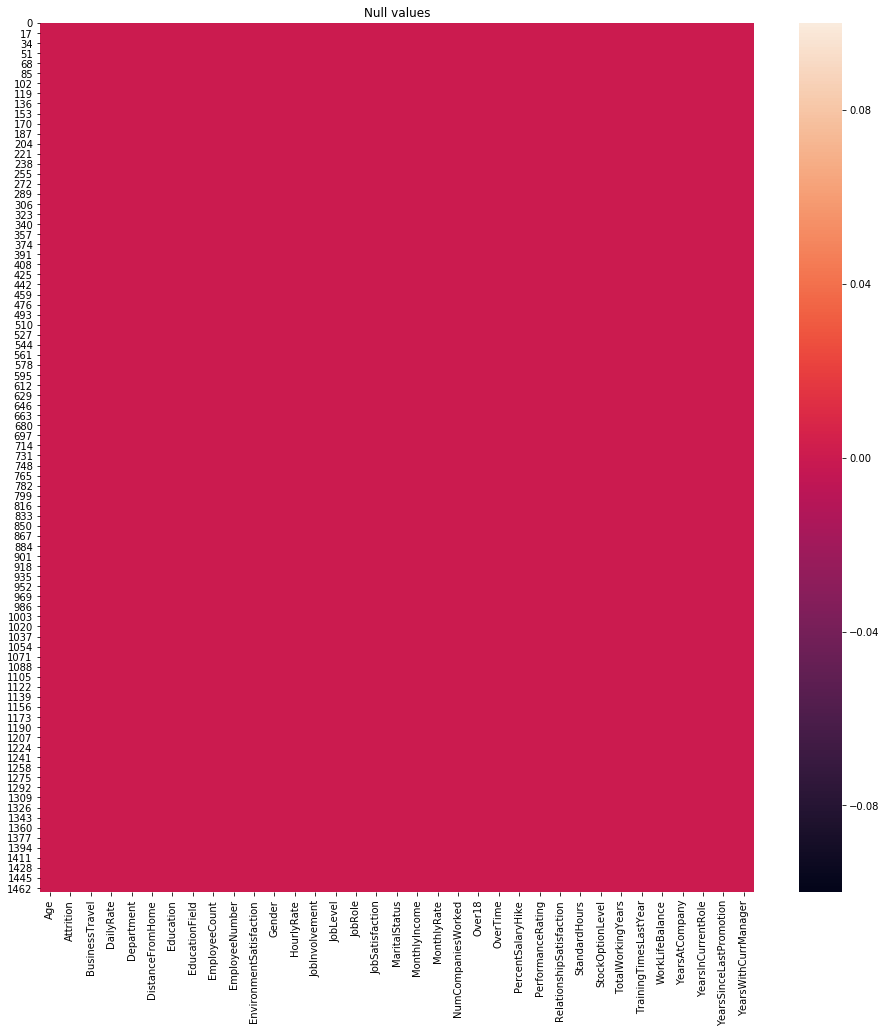

In [10]:
#Heat map to check the null values
plt.figure(figsize=[16,16])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Observation: there is no null values in the data

In [11]:
#to check the classification in target variable
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Observation :
1. Classification "yes" is the less then the "No" values 
2. We can see clearly the dataset is imbalanced need to treat    

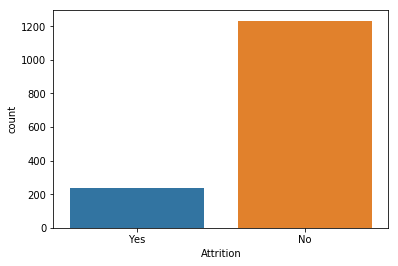

In [13]:
#univariate analysis
sns.countplot(df['Attrition'])
plt.show()

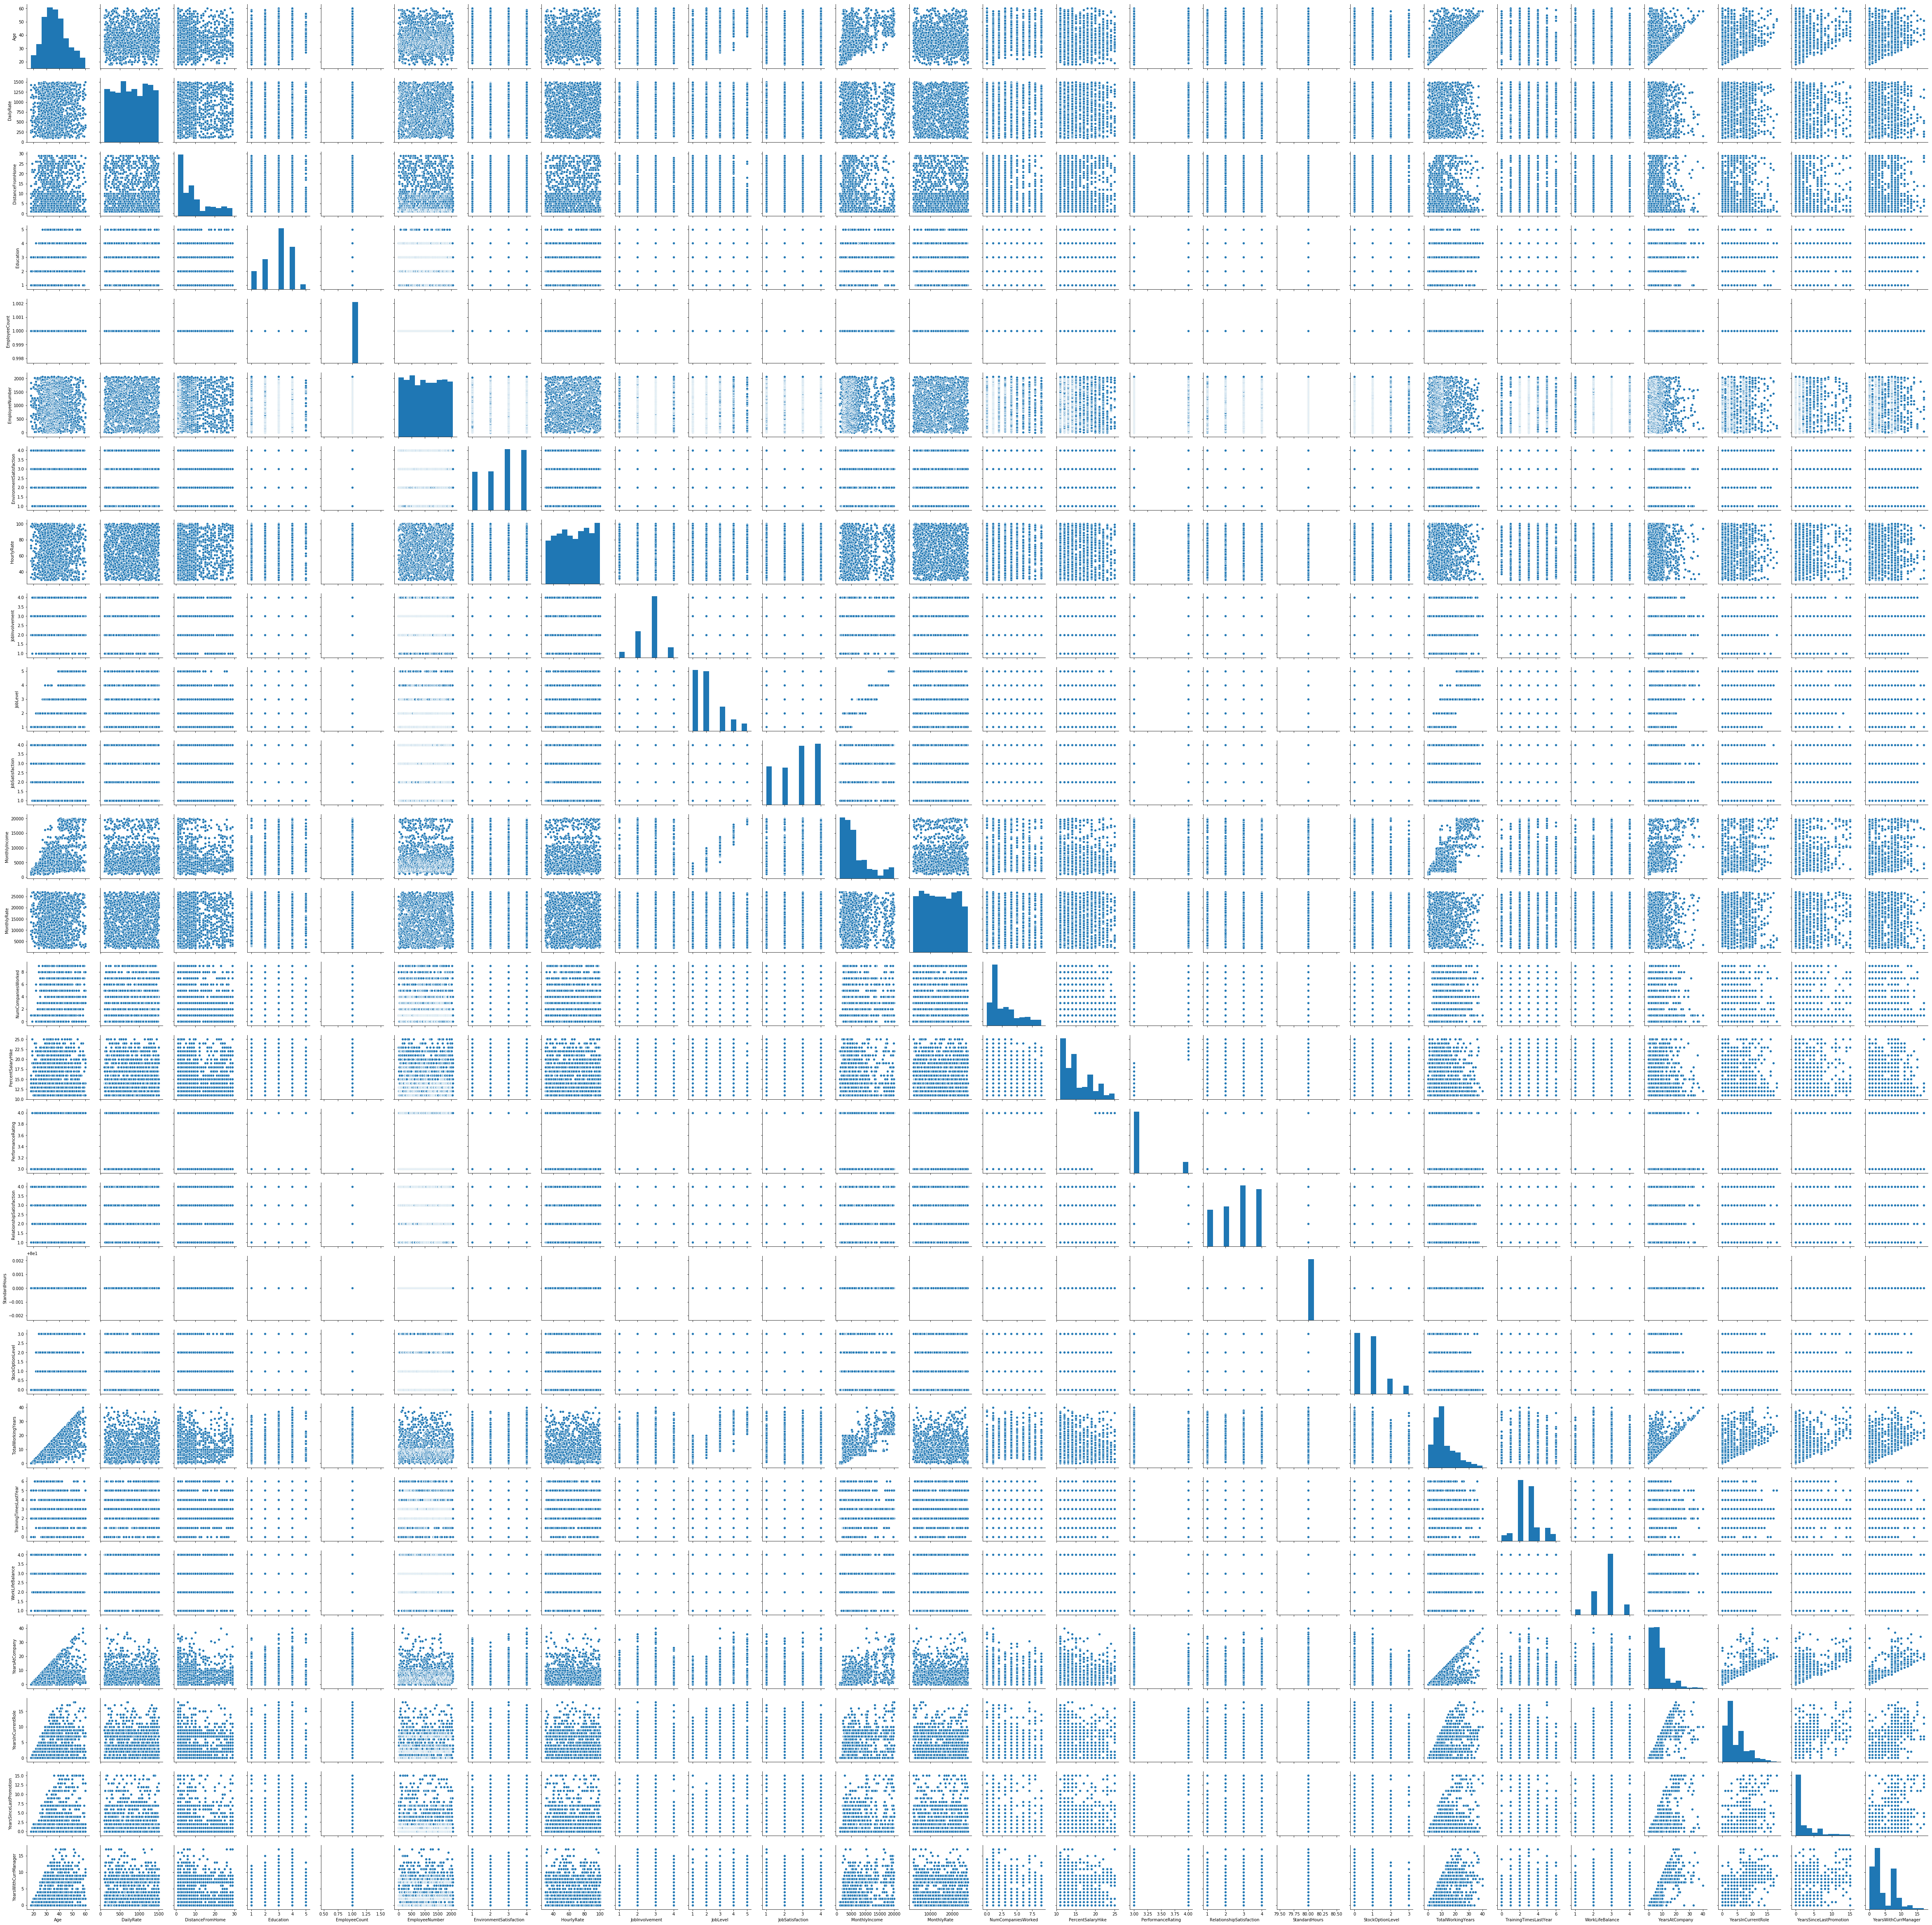

In [17]:
# plot pairplot
sns.pairplot(df)
plt.show()

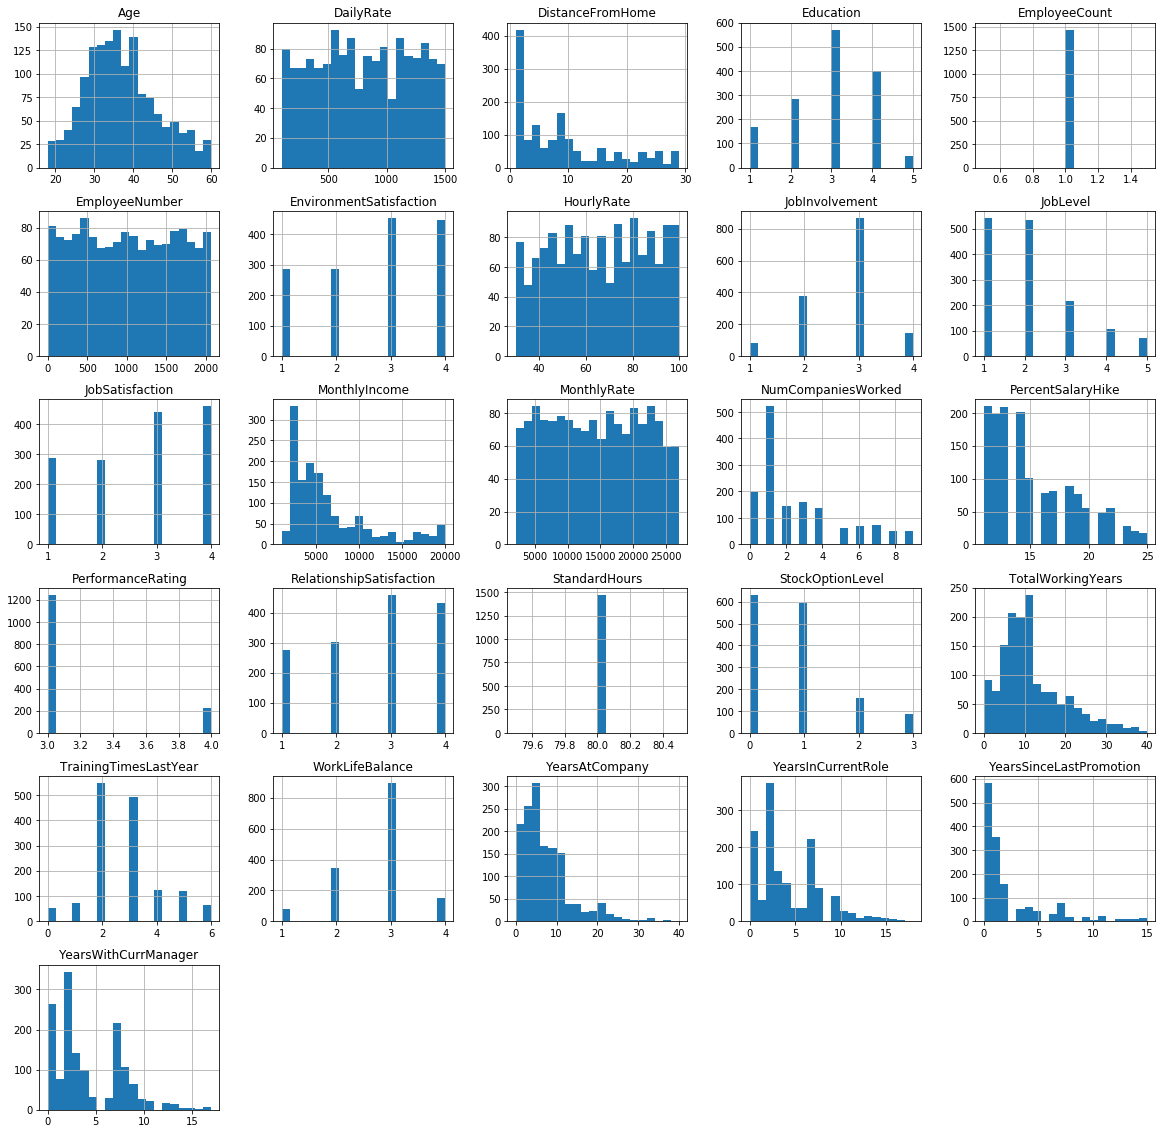

In [27]:
#plot histogram
df.hist(bins=20,figsize=(20,20))
plt.show()

Observation: most of the variables data is not distributed properly  Right skewed and and left skewed

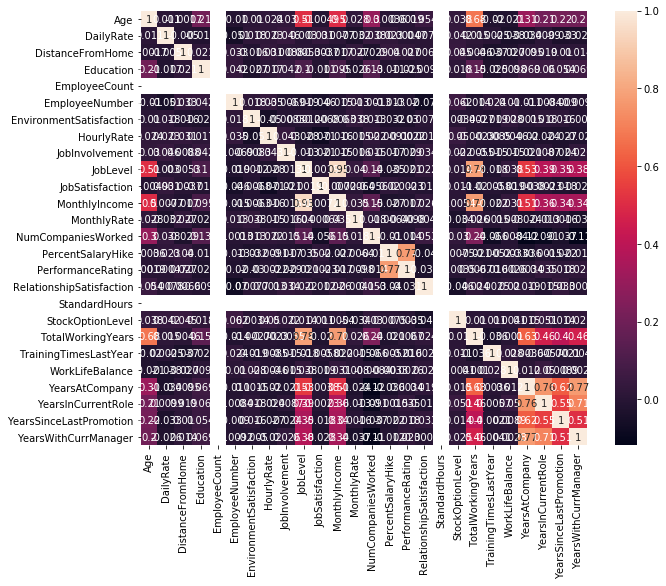

In [28]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_hmap, annot=True)
plt.show()

In [29]:
#to display the
corr_matrix=df.corr()
corr_matrix['best quality'].sort_values(ascending = False)


KeyError: 'best quality'

In [ ]:
columns =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'best quality']
        
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

In [ ]:
# with the help of box plot checking the outliers in data set 

for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

In [ ]:
#Spliting the data into x and y

x =df.drop(['quality','best quality'],axis=1)
y=df['best quality']

In [ ]:
# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
# import libraries
#NOrmalizing the data using minmax scaler
  
from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(x_train)
# transfromation of trainig data
scal_xtrain = norm_fit.transform(x_train)
# transformation of testing data
scal_xtest = norm_fit.transform(x_test)
print(scal_xtrain)

In [ ]:
#import library
from collections import Counter
from imblearn.over_sampling import SMOTE
counter =Counter(y_train)
print('Before', counter)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

counter =Counter(y_smote)
print('after', counter)

In [ ]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
#dt.fit(x_smote,y_smote)   #over sampled data using here
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))


In [ ]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
#lg.fit(x_smote,y_smote)   #minority class balanced data 
lg.fit(x_train,y_train)
pred =lg.predict(x_test)
print(pred)

In [ ]:
print("accuracy_score", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
#AUC ROC CURVE

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [ ]:

y_pred_prob =lg.predict_proba(x_test)[:,1]

y_pred_prob


In [ ]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Not good wine ')
plt.ylabel('Good wine ')
plt.title('Losgistic Regression')
plt.show()


In [ ]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [ ]:
print(auc_score)

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print(score.mean())


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
#rf.fit(x_smote, y_smote)  #balanced data
rf.fit(x_train, y_train)
pred=rf.predict(x_test)
print('accuracy score', pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
#importing the svm model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
#svclassifier.fit(x_smote, y_smote)  #balanced data
y_pred = svclassifier.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#### Saving the Model
SVC model getting the highest accuarcy so we are saving the model

In [ ]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(svclassifier, 'svclassifier.pkl')
  
# Load the model from the file
svclassifier_joblib = joblib.load('svclassifier.pkl') 
  
# Use the loaded model to make predictions
#svclassifier_joblib.predict(x_test)
